In [1]:
#importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc

In [2]:
data_stroke = pd.read_csv("healthcare-dataset-stroke-data.csv", comment="#", sep=',')
data_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#INFORMACJE O DANYCH
#rózne typy danych - trzeba pozmieniać
#BMI - barkuje 201 kolumn - ?? - trzeba zrobić coś na NaNami
#co zrobić z hypertension i heart_disease - to kategoryczne???
# to samo do ever_maried, work_type, residence_type, smiking_status
type(data_stroke)
data_stroke.shape
data_stroke.columns
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:

data_stroke_nan_index = data_stroke.index[data_stroke.isnull().any(axis=1)]
data_stroke.iloc[data_stroke_nan_index]

In [3]:
def generate_plots_and_tables_by_tagret(df: pd.DataFrame, target_column: str = "DefFlag",
                                        numeric_cols: list = [], categorical_cols: list = []) -> None:
    """
    Generate plots of the 'target_column' column with other columns in a pandas dataframe.
    If a column is a string or factor, a bar plot with grouping by 'target_column' will be created.
    If a column is continuous, a histogram, boxplot, and scatter plot with grouping by 'target_column' will be created.
    """
    for column in categorical_cols:
        print(column + ":")
        
        plt.figure(figsize=(8, 6))
            
        counts = df.groupby([column, target_column], group_keys=True).size()
        print(counts)
        counts_norm = counts.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum())
        counts_norm = counts_norm.reset_index(name='percent')
        sns.barplot(x=column, y='percent', hue=target_column, data=counts_norm)
        plt.title(f"'stroke' vs '{column}'")
        plt.show()
            
    for column in numeric_cols:
        
        plt.figure(figsize=(18, 6))
            
        plt.subplot(1, 2, 1)
        sns.histplot(x=column, hue=target_column, data=df, kde=True)
        plt.title(f"'stroke' vs '{column}' (Histogram)")
            
        plt.subplot(1, 2, 2)
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f"'stroke' vs '{column}' (Boxplot)")
            
        plt.tight_layout()
        plt.show()

gender:
gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64


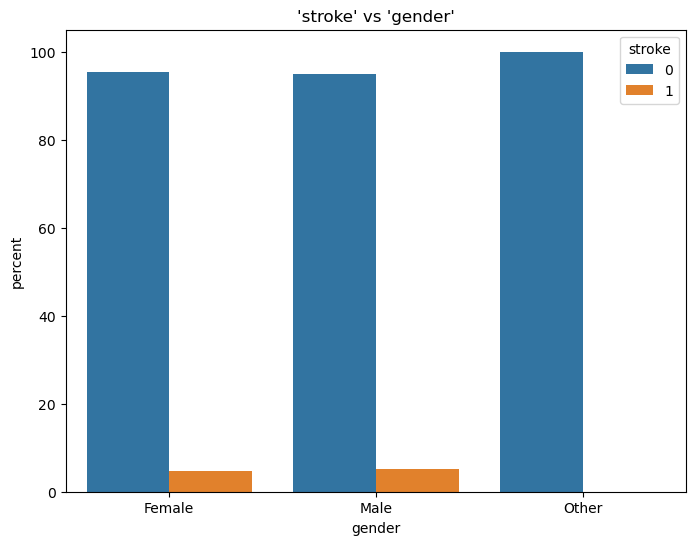

hypertension:
hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
dtype: int64


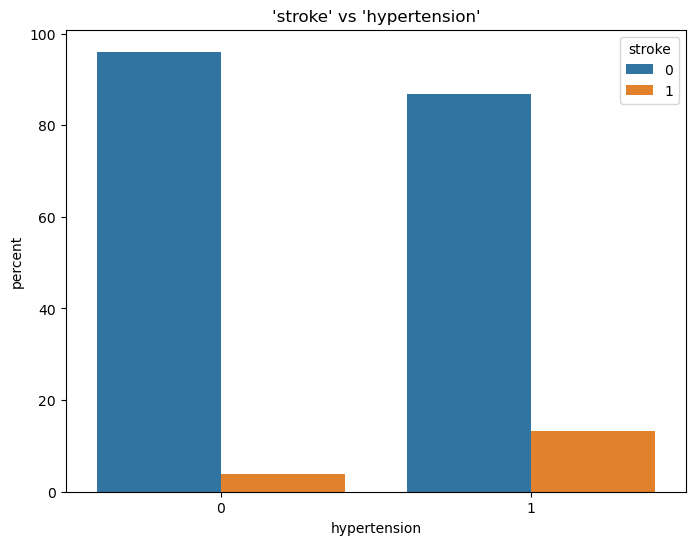

heart_disease:
heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
dtype: int64


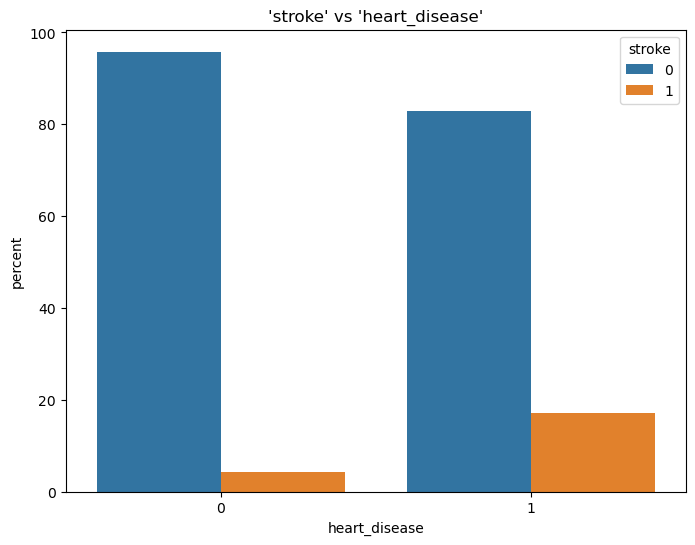

ever_married:
ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64


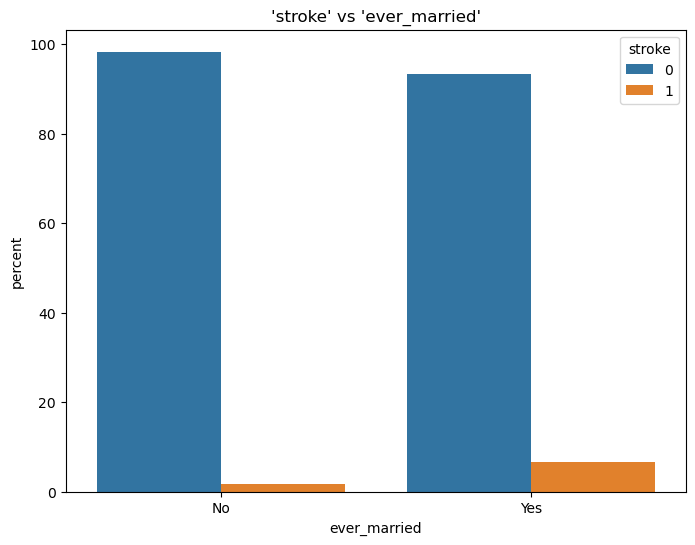

work_type:
work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
dtype: int64


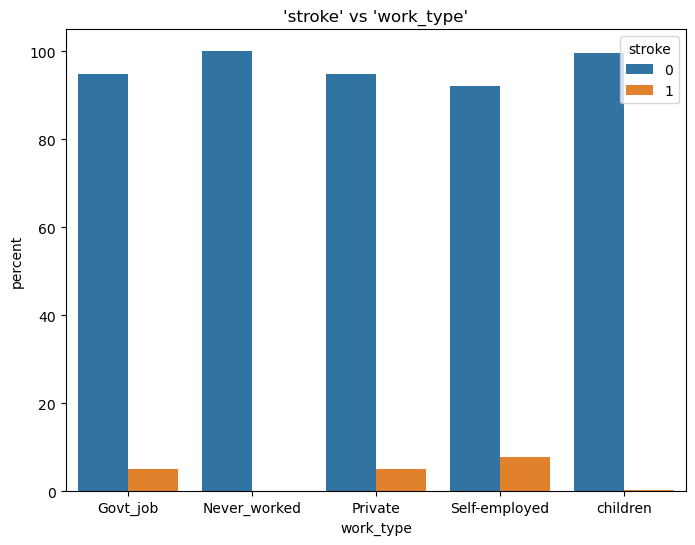

Residence_type:
Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
dtype: int64


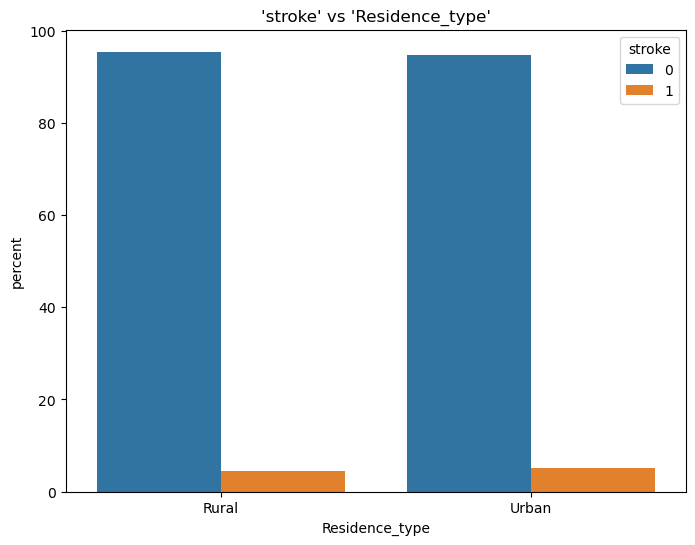

smoking_status:
smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
dtype: int64


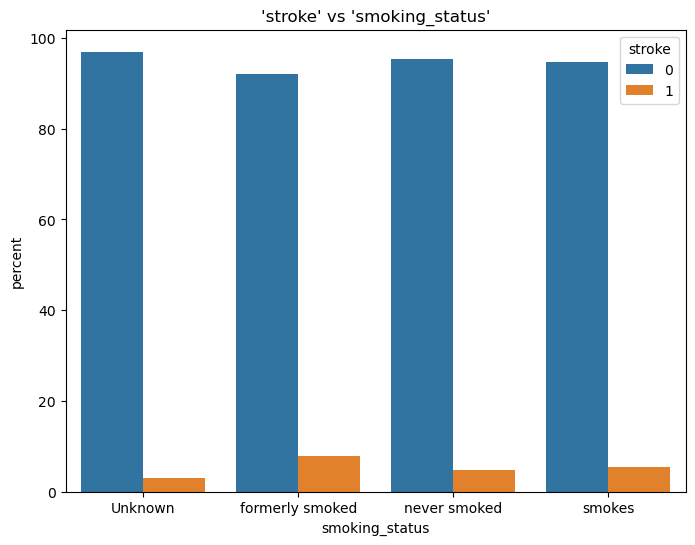

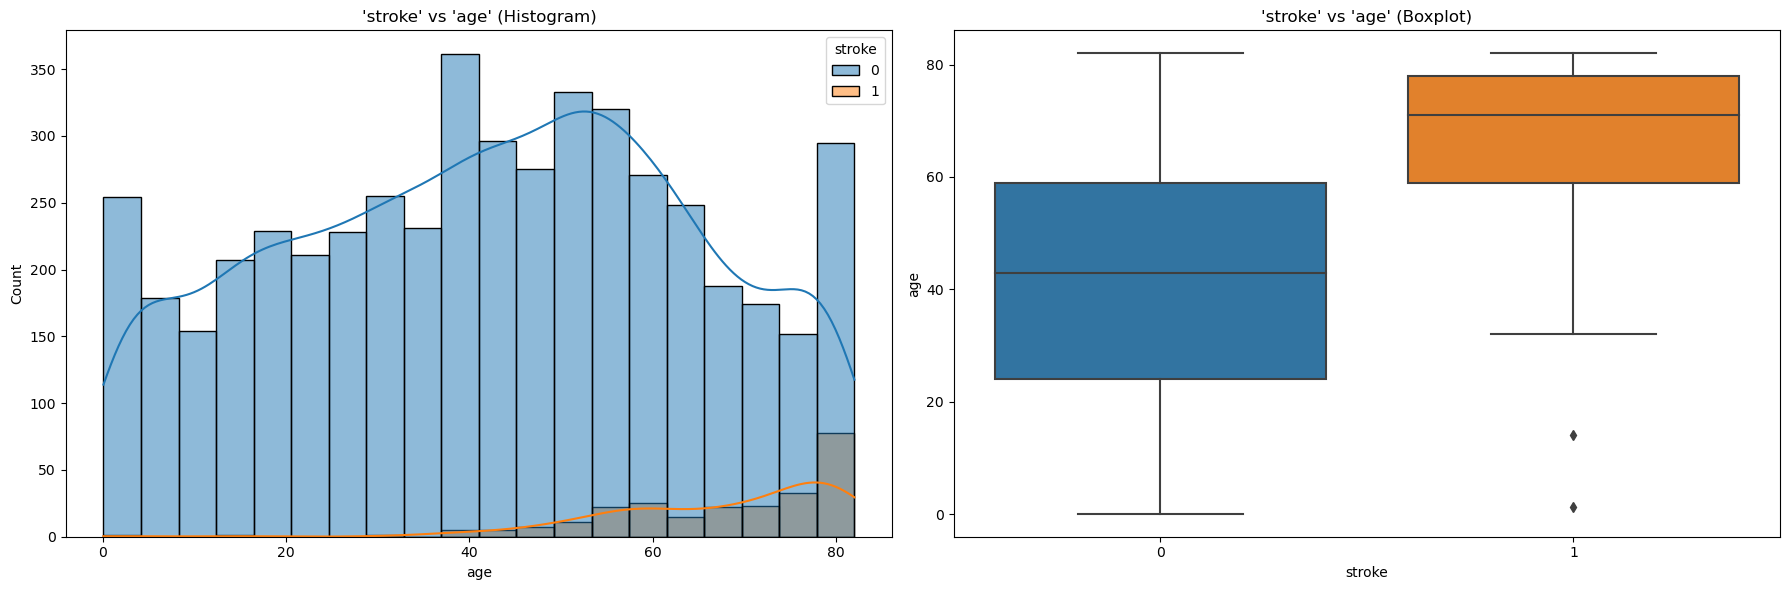

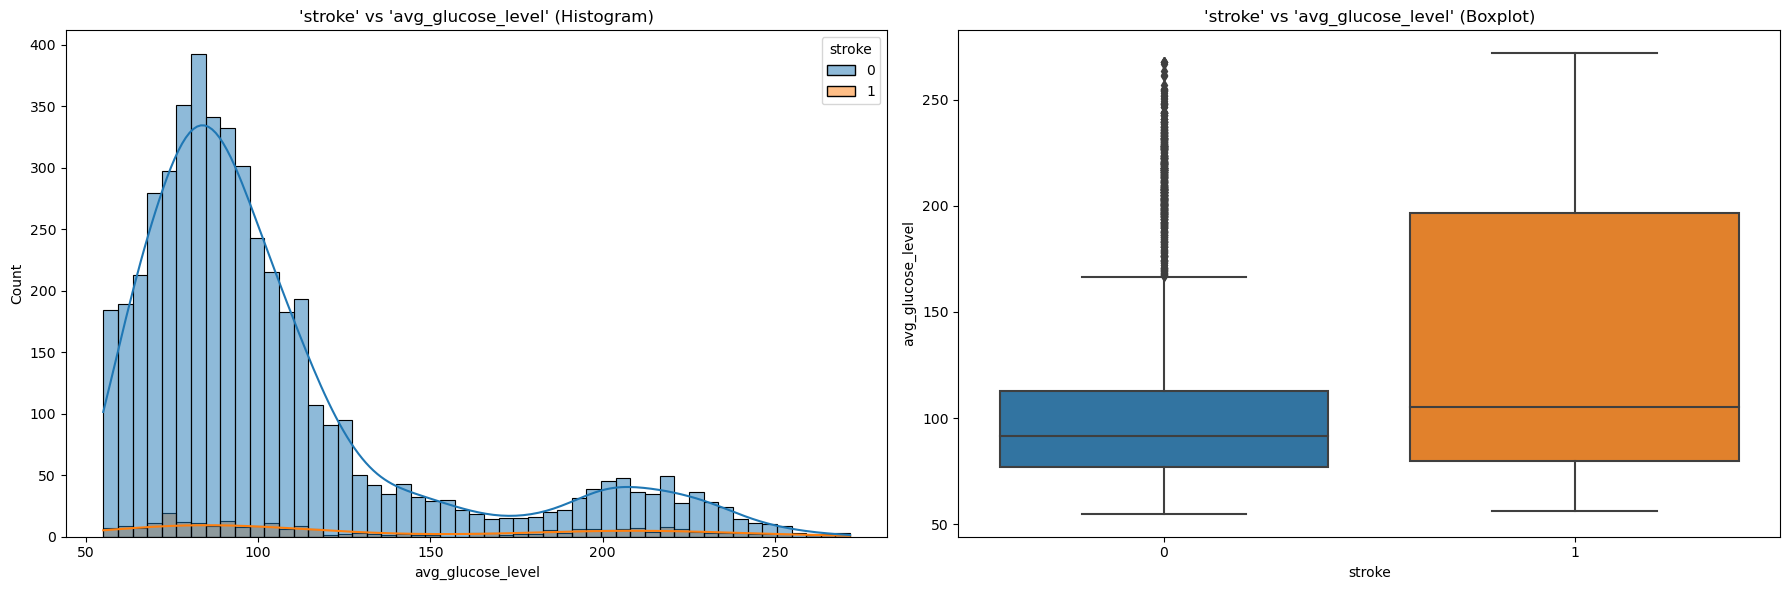

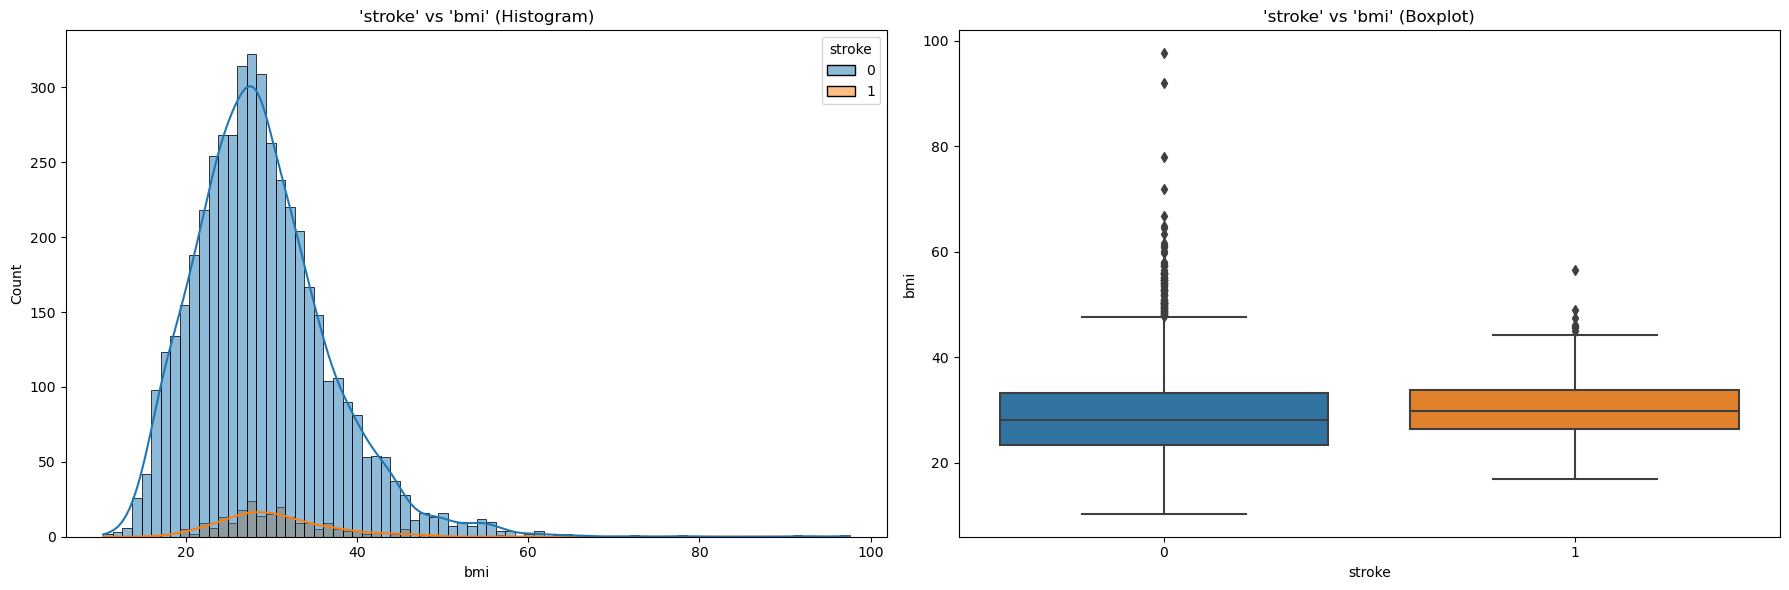

In [4]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
generate_plots_and_tables_by_tagret(data_stroke, 'stroke', num_cols, cat_cols)

In [ ]:
object_columns = adult.select_dtypes(include='object').columns.drop('Income')

for col in object_columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    adult.groupby(col)['Income'].value_counts(normalize=False).unstack().plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title(col + ' (Non-Normalized)')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')

    adult.groupby(col)['Income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title(col + ' (Normalized)')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Procent')

    plt.show()

In [5]:
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data_stroke.drop('id', axis=1, inplace=True)

In [ ]:
data_stroke.isnull().mean() * 100

In [ ]:
#for col in ['bmi']:
    #data_stroke[col].fillna(adult[col].mode()[0], inplace=True)
    #Ponieważ braki są niewielkie i tylko dla kolumn kategorycznych użyjemy imputacji modą:?? - z projektu faceta

In [ ]:
#zmienie kategorie
#pozmieniam zmienne objekt na category - jak to zrobić w jednej linijce???
data_stroke.gender = data_stroke.gender.astype('category')

In [ ]:
data_stroke.hypertension = data_stroke.hypertension.astype('category')
data_stroke.heart_disease = data_stroke.heart_disease.astype('category')
data_stroke.ever_married = data_stroke.ever_married.astype('category')
data_stroke.work_type = data_stroke.work_type.astype('category')
data_stroke.Residence_type = data_stroke.Residence_type.astype('category')
data_stroke.smoking_status = data_stroke.smoking_status.astype('category')
data_stroke.stroke = data_stroke.stroke.astype('category')

In [ ]:
data_stroke.info()

In [ ]:
data_stroke.describe().round(2)

In [ ]:
#USUWANIE/INPUTACJA BRAKÓW DANYCH
data_stroke_nan_index = data_stroke.index[data_stroke.isnull().any(axis=1)]
data_stroke.iloc[data_stroke_nan_index]

In [ ]:
#BMI - barkuje 201 kolumn - ?? - trzeba zrobić coś na NaNami
#wszystkich obserwacji 5110 (100%), więc 201 to będzie niecałe 4%, zacznę od usunięcia i zobaczę co dalej będzie
data_stroke.dropna(inplace=True)

In [ ]:
#mam dane bez nonow
data_stroke.head()

In [ ]:
data_stroke.info()

In [ ]:
#Przy klasyfikacji jednym z najwazniejszych pytań podczas eksploracyjnej analizy danych jest zbalansowanie zmiennej zaleznej a raczej jego brak. W przypadku niezbalansowanych danych dużo trudniej jest zbudować dobrze działający klasyfikator.

counts = data_stroke['stroke'].value_counts()
percentages = counts / counts.sum() * 100

plt.bar(percentages.index, percentages.values) # zmienić na yes/no poziomą wartość
plt.title('Stroke Column')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#poznaje kolejne kolumny nietypowe
data_stroke.groupby('gender').count()

#gender ma male, female ( w miarę równo rozłożone) i kolumne inne(1 odczyt) - MOŻE USUNAĆ


In [ ]:
data_stroke.drop(data_stroke[data_stroke['gender']=='Other'].index, inplace=True) ###tu usunąc tego other!!!

In [ ]:
data_stroke.groupby('gender').count()

In [ ]:
data_stroke.groupby('ever_married').count()
#kolumny yes, no(trochę nierówno 1727:3353)

In [ ]:
data_stroke.groupby('work_type').count()
#5 rodzajów - govt job - praca rządowa,

In [ ]:
data_stroke.groupby('Residence_type').count()
#tylko miejskie i wiejskie(równo ułożone)

In [ ]:
data_stroke.groupby('smoking_status').count()
#4 rodzaje - w tym jeden - unknown

In [ ]:
data_stroke.groupby('stroke').count()
#zmienna celu
#tu mamy dwa rodzaje - duża nierówność prawie 5000:250

#OUTLIERY
#wiek i glukoza wyglądają znośnie, BMI ma dziwne wyniki

    poniżej 16 - wygłodzenie
    16 - 16.99 - wychudzenie
    17 - 18.49 - niedowagę
    18.5 - 24.99 - wagę prawidłową
    25.0 - 29.9 - nadwagę
    30.0 - 34.99 - I stopień otyłości
    35.0 - 39.99 - II stopień otyłości
    powyżej 40.0 - otyłość skrajną


In [ ]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=data_stroke, x=col, hue='stroke', kde=True, ax=ax1)
    sns.boxplot(data=data_stroke, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

In [ ]:
#Szukam outlierów metodą z_scores
data_stroke_imputed = pd.DataFrame(data_stroke, columns=['age', 'avg_glucose_level', 'bmi'])

means = np.mean(data_stroke_imputed, axis=0)
sds = np.std(data_stroke_imputed, axis=0)
z_scores = np.abs(data_stroke_imputed - means) / sds
outliers = np.where(z_scores > 3)

print(outliers)

In [ ]:
data_stroke_imputed.iloc[outliers[0][outliers[1] == 2]]

In [ ]:
data_stroke = data_stroke[data_stroke["bmi"] <= 52] #powyżej 60 to chyba niemożliwe 

In [ ]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=data_stroke, x=col, hue='stroke', kde=True, ax=ax1)
    sns.boxplot(data=data_stroke, x='stroke', y=col, ax=ax2)
    fig.suptitle(f'{col} by stroke', fontsize=14)
    plt.show()

In [ ]:
#szukam korelacji
plt.figure(figsize = (12,12))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(data_stroke.corr(numeric_only = True), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [ ]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
# Tworzenie obiektu skaler
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']

# Dopasowanie skalera do danych i wykonanie transformacji
data_stroke= scaler.fit_transform(data_stroke[num_cols])

print(data_stroke)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#import numpy as np

# Tworzenie obiektu skaler
#scaler = MinMaxScaler()

# Dopasowanie skalera do danych i wykonanie transformacji
#data_stroke_normalized1 = scaler.fit_transform(data_stroke[num_cols])

#print(data_stroke_normalized1)

In [ ]:
#from sklearn.preprocessing import RobustScaler
#import numpy as np

# Tworzenie obiektu skaler
#scaler = RobustScaler()

# Dopasowanie skalera do danych i wykonanie transformacji
#data_stroke_normalized3 = scaler.fit_transform(data_stroke[num_cols])

#print(data_stroke_normalized3)

In [ ]:
#kodowanie zmiennych kateorycznych
# inicjalizacja OneHotEncoder
#encoder = OneHotEncoder()

# dopasowanie i transformacja danych
#data_stroke = encoder.fit_transform(data_stroke[cat_cols])

# wyświetlenie wyników
#print(data_stroke.toarray())

In [ ]:
def generate_plots_and_tables_by_tagret(df: pd.DataFrame, target_column: str = "DefFlag",
                                        numeric_cols: list = [], categorical_cols: list = []) -> None:
    """
    Generate plots of the 'target_column' column with other columns in a pandas dataframe.
    If a column is a string or factor, a bar plot with grouping by 'target_column' will be created.
    If a column is continuous, a histogram, boxplot, and scatter plot with grouping by 'target_column' will be created.
    """
    for column in categorical_cols:
        print(column + ":")
        
        plt.figure(figsize=(8, 6))
            
        counts = df.groupby([column, target_column], group_keys=True).size()
        print(counts)
        counts_norm = counts.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum())
        counts_norm = counts_norm.reset_index(name='percent')
        sns.barplot(x=column, y='percent', hue=target_column, data=counts_norm)
        plt.title(f"'stroke' vs '{column}'")
        plt.show()
            
    for column in numeric_cols:
        
        plt.figure(figsize=(18, 6))
            
        plt.subplot(1, 2, 1)
        sns.histplot(x=column, hue=target_column, data=df, kde=True)
        plt.title(f"'stroke' vs '{column}' (Histogram)")
            
        plt.subplot(1, 2, 2)
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f"'stroke' vs '{column}' (Boxplot)")
            
        plt.tight_layout()
        plt.show()

In [ ]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
generate_plots_and_tables_by_tagret(data_stroke, 'stroke', num_cols, cat_cols)

In [ ]:
#płeć - nie ma znaczenia???
#hypertensjon, heart_diseanse - ma???
#wiek - ma???

In [ ]:
# Wyodrębnienie predyktorów i zmiennej objaśnianej
X = data_stroke.drop(columns=['stroke'])
y = data_stroke.stroke

# Podział danych na zestaw uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
# Budowa modelu regresji liniowej
model = LinearRegression()
results = model.fit(X_train, y_train)

# Predykcja wartości dla zbioru treningowego i testowego
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)

# Błąd kwadratowy dla zbioru treningowego i testowego
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Błąd kwadratowy dla zbioru treningowego: ", mse_train)
print("Błąd kwadratowy dla zbioru testowego: ", mse_test)

# R^2 dla zbioru treningowego i testowego
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 dla zbioru treningowego: ", r2_train)
print("R^2 dla zbioru testowego: ", r2_test)